# 선형회귀 - 당뇨병 수치

## 1. Load dataset

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [7]:
diabetes_X = np.array(diabetes.data)
diabetes_y = np.array(diabetes.target)

## 2. Split dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=25)

## 3. Define model, loss function, gradient

In [50]:
def Linear_Regression(X,W,b):
    return np.dot(W,X.T) + b

In [58]:
def MSE(_pred, _ans):
    return sum((_pred - _ans)**2)/len(_pred)

In [29]:
def get_loss(X,W,b,y):
    predictions = Linear_Regression(X,W,b)
    loss = MSE(predictions,y)
    return loss

In [30]:
def gradient(X, W, b, y):
    y_pred = Linear_Regression(X,W,b)
    dW = 1/len(W) * 2 * X.T.dot(y_pred-y)
    db = 2 * (y_pred - y).mean()
    return dW, db

## 4. Train a model

In [65]:
LEARNING_RATE = 0.001

losses = []

W = np.random.rand(X_train.shape[1])
b = np.random.rand()


for i in range(1,5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    loss = get_loss(X_train, W, b, y_train)
    losses.append(loss)
    if i%500 == 0:
        print('iteration {} : LOSS %0.4f'.format(i) %(loss))

iteration 500 : LOSS 8124.8033
iteration 1000 : LOSS 4785.1755
iteration 1500 : LOSS 4020.3585
iteration 2000 : LOSS 3714.1639
iteration 2500 : LOSS 3534.5997
iteration 3000 : LOSS 3411.3078
iteration 3500 : LOSS 3320.4462
iteration 4000 : LOSS 3250.5241
iteration 4500 : LOSS 3195.0483
iteration 5000 : LOSS 3150.0601


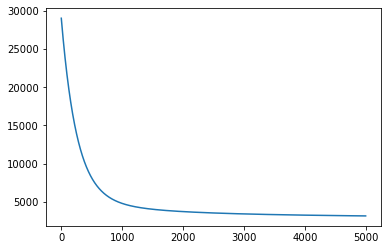

In [68]:
plt.plot(losses)
plt.show()

## 5. Predict

In [73]:
prediction = Linear_Regression(X_test,W,b)
print('MSE for test data: {}'.format(MSE(prediction, y_test)))

MSE for test data: 2956.8435504347976


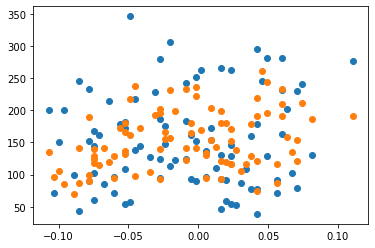

In [74]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 선형회귀 - 자전거 타는 사람

## 1. Load dataset

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%matplotlib inline

In [99]:
train = pd.read_csv("~/aiffel/dataset/E5_bike_regression/data/train.csv")
test = pd.read_csv("~/aiffel/dataset/E5_bike_regression/data/test.csv")

## 2. Preprocess dataset

### handling datetime

In [101]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

<AxesSubplot:xlabel='second', ylabel='count'>

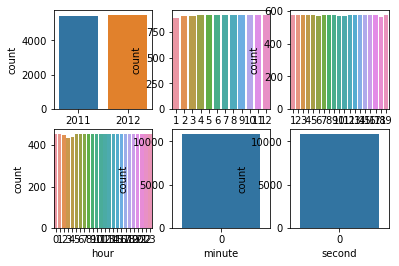

In [93]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)

sns.countplot(data=train, x="year", ax=ax1)
sns.countplot(data=train, x="month", ax=ax2)
sns.countplot(data=train, x="day", ax=ax3)
sns.countplot(data=train, x="hour", ax=ax4)
sns.countplot(data=train, x="minute", ax=ax5)
sns.countplot(data=train, x="second", ax=ax6)

In [107]:
# 'casual', 'registered', 'count'
bicycle_train_y = train[['count']]
bicycle_train_X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']]


In [106]:
X_train, X_test, y_train, y_test = train_test_split(bicycle_train_X, bicycle_train_y, test_size=0.2, random_state=25)

## 3. Train a model

In [108]:
bicycle_model_LR = LinearRegression()
bicycle_model_LR.fit(X_train, y_train)

LinearRegression()

## 4. Test a model

In [117]:
bicycle_predictions = bicycle_model_LR.predict(X_test)

In [123]:
def MSE(_pred, _ans):
    return sum((_pred - _ans)**2)/len(_pred)

def RMSE(_pred, _ans):
    return (sum((_pred - _ans)**2)/len(_pred))**0.5

In [121]:
MSE(bicycle_predictions, y_test.values)

array([21313.67889643])

In [124]:
RMSE(bicycle_predictions, y_test.values)

array([145.9920508])

In [161]:
test_concat_df = X_test
test_concat_df['y_test'] = y_test['count']
test_concat_df['predict'] = bicycle_predictions
test_concat_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,y_test,predict
1616,2,0,1,3,15.58,19.695,94,15.0013,2011,4,13,6,34,-14.785400
7554,2,0,1,2,23.78,27.275,68,22.0028,2012,5,14,3,2,165.222178
4137,4,0,1,1,19.68,23.485,67,19.0012,2011,10,4,10,126,149.825483
9266,3,0,0,1,27.06,31.060,47,16.9979,2012,9,9,11,585,330.995126
110,1,0,1,1,9.84,12.880,38,7.0015,2011,1,5,19,132,142.158424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,4,0,0,1,10.66,13.635,52,8.9981,2011,12,18,19,135,214.869426
7334,2,0,1,1,24.60,28.030,83,6.0032,2012,5,4,23,256,289.907788
8115,2,0,1,3,22.96,26.515,78,8.9981,2012,6,18,12,168,209.913787
9504,3,0,1,1,22.14,25.760,60,16.9979,2012,9,19,9,362,255.771827


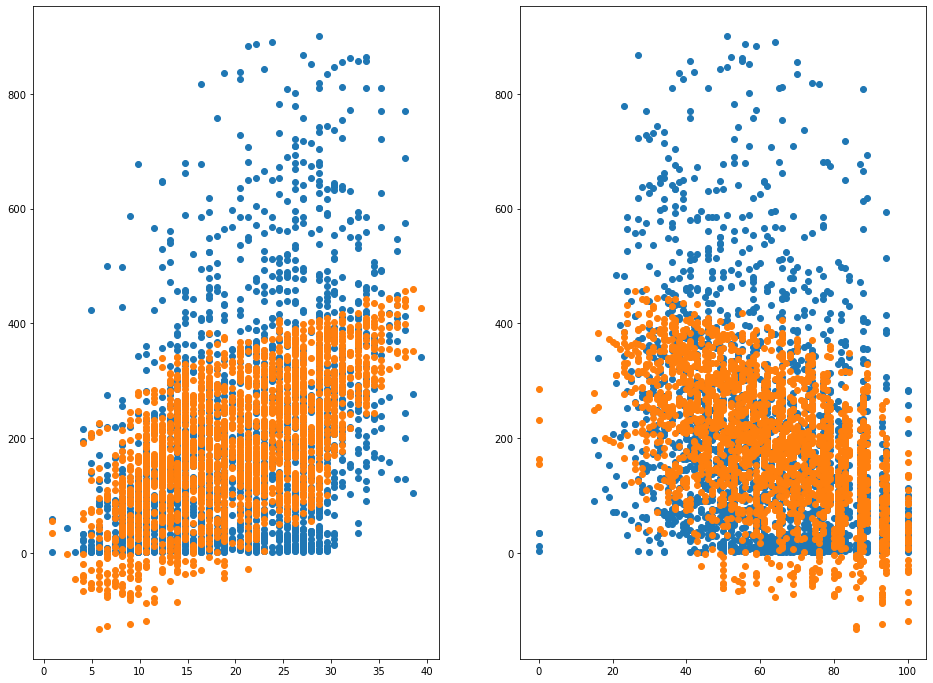

In [173]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize = (16, 12))

axes[0].scatter(X_test['temp'], y_test)
axes[0].scatter(X_test['temp'], bicycle_predictions)

axes[1].scatter(X_test['humidity'], y_test)
axes[1].scatter(X_test['humidity'], bicycle_predictions)

plt.show()